In [1]:
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

import emoji
import regex

import re
import string

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("imd_m_web_charm.csv", delimiter = ";")
df.head()
#1596 last of us 
# 1596+wheel = 2374
#=8127

,rates_star,titles,date_comment,who_found_comment_helpful,comments,Movie_title,Genres
0,6/10,Starts very strong and then fades in the stretch,11 October 2023,0 out of 0 found this helpful. Was this review...,"This review is based on Season 1, and I haven'...",Last of us Movie,"Action, Adventure, Drama"
1,7/10,Well made. Skip Episode 3,11 October 2023,1 out of 2 found this helpful. Was this review...,It has been a few years since I played the ori...,Last of us Movie,"Action, Adventure, Drama"
2,5/10,Surely overrated,6 October 2023,2 out of 4 found this helpful. Was this review...,Review of Season One:\n\nScreen adaptations of...,Last of us Movie,"Action, Adventure, Drama"
3,10/10,Would highly recommend this show.,25 September 2023,1 out of 1 found this helpful. Was this review...,I applaud hbo for making video game to TV show...,Last of us Movie,"Action, Adventure, Drama"
4,10/10,Worth watching,23 September 2023,1 out of 1 found this helpful. Was this review...,"It's much better than I expected, the series h...",Last of us Movie,"Action, Adventure, Drama"


### Data Cleaning 
>Created a movie title column Filled Nans with the specific movie name 

>created a genre column and added the movies genres 

>filled nans in comment column as spoilers based on the fact that in the website they are indicated as soilers

In [ ]:
#rename column 
#df.rename(columns={"Unnamed: 6" : "Movie_title"}, inplace = True)
# fillna with movie name 
#df['Movie_title'] = df['Movie_title'].fillna('Last of us Movie')
#df['Movie_title'] = df['Movie_title'].fillna('The wheel of Time')
#df['Movie_title'] = df['Movie_title'].fillna('Stranger Things')
#df['Movie_title'] = df['Movie_title'].fillna('The Witcher')
#df['Movie_title'] = df['Movie_title'].fillna('Game of Thrones')
#df['Movie_title'] = df['Movie_title'].fillna('Picky Blinders')
#df['Movie_title'] = df['Movie_title'].fillna('John Wick chapter:4')
#df['Movie_title'] = df['Movie_title'].fillna('The Wolf of Wall Street')
#df['Movie_title'] = df['Movie_title'].fillna('One Piece')
#df['Movie_title'] = df['Movie_title'].fillna('Special Ops:Lioness')
#df['Movie_title'] = df['Movie_title'].fillna('The Lord of the Rings: The Return of the King')

In [ ]:
#genre column 
#df.loc[df['Movie_title'] == 'The Lord of the Rings: The Return of the King', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Special Ops:Lioness', 'Genres'] = 'Action, Drama, Thriller'
#df.loc[df['Movie_title'] == 'One Piece', 'Genres'] = 'Action, Adventure, Comedy'
#df.loc[df['Movie_title'] == 'The Wolf of Wall Street', 'Genres'] = 'Biography, Comedy, Crime'
#df.loc[df['Movie_title'] == 'John Wick chapter:4', 'Genres'] = 'Action, Crime, Thriller'
#df.loc[df['Movie_title'] == 'Picky Blinders', 'Genres'] = 'Crime, Drama'
#df.loc[df['Movie_title'] == 'Game of Thrones', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'The Witcher', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Stranger Things', 'Genres'] = 'Drama, Fantasy, Horror'
#df.loc[df['Movie_title'] == 'The wheel of Time', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Last of us Movie', 'Genres'] = 'Action, Adventure, Drama'
#df.drop('user_name', axis=1,inplace = True)

In [ ]:
#clean empty column 
#we will fill with spoiler because the heading is already giving hints 
#df['comments'] = df['comments'].fillna('Spoilers ')

In [ ]:
# save Clean Dataframe 
#df.to_csv("imd_m_web_charm.csv", index=False, sep=";")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26836 entries, 0 to 26835
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   rates_star                 26836 non-null  object
 1   titles                     26836 non-null  object
 2   date_comment               26836 non-null  object
 3   who_found_comment_helpful  26836 non-null  object
 4   comments                   26836 non-null  object
 5   Movie_title                26836 non-null  object
 6   Genres                     26836 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


#The comments are the core of your analysis. Perform sentiment analysis, topic modeling, and content summarization based on these reviews.

### Text Preprocessing 

These are the most common words:  [('movie', 18950), ('one', 14194), ('show', 14194), ('like', 12683), ('film', 12393), ('story', 10930), ('season', 10429), ('series', 10408), ('good', 9712), ('great', 8757)]


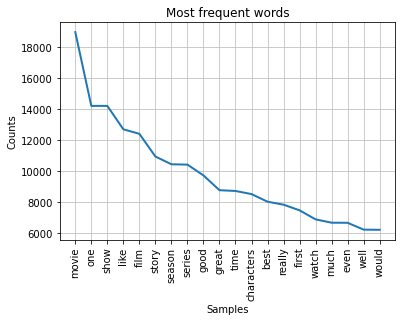

In [4]:
# Lowercase the comments
df['comments'] = df['comments'].str.lower()

# Remove HTML tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

df['comments'] = df['comments'].apply(remove_html_tags)

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
df['comments'] = df['comments'].apply(lambda x: x.translate(translator))

# Remove stopwords
stop_words = set(stopwords.words("english"))
df['comments'] = df['comments'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Tokenize
df['comments'] = df['comments'].apply(word_tokenize)

# Compute frequency distribution
fdist = FreqDist()
for word_token in df['comments']:
    for word in word_token:
        fdist[word] += 1

# Print the most common words
print('These are the most common words: ', fdist.most_common(10))

# Plot
fdist.plot(20, title="Most frequent words")
plt.show()

In [23]:

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.distinct_emoji_list['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list
#emojis preprocessing we will use a tokenizer to 
#translate the direct reaction of an emoji

In [29]:
line_list = ["🤔 🙈 me así, se 😌 ds 💕👭👙 hello 👩🏾‍🎓 emoji hello 👨‍👩‍👦‍👦 how are 😊 you today🙅🏽🙅🏽"]
new_line_list = []

for word in line_list:
  emojis = emoji.distinct_emoji_list(word)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

In [30]:
print(new_line_list)

[':person_gesturing_NO_medium_skin_tone:', ':bikini:', ':two_hearts:', ':relieved_face:', ':woman_student_medium-dark_skin_tone:', ':family_man_woman_boy_boy:', ':smiling_face_with_smiling_eyes:', ':women_holding_hands:', ':see-no-evil_monkey:', ':thinking_face:']


In [72]:
#lemmatization
#cutting words like running to be run for meaning not to be lost 

In [ ]:
#handle numericals to alphanumerics
#those comments with numerals like '1' we want change them to be in 'words'

In [ ]:
#handle white spaces 
#incase we have 2 or 3 blank spaces its fillied with one 

#spelling check 
#lets make sure the words used are in the dictionary

#vectorize
#changing our column text to numbers for training data prep

#Text normalization 


In [ ]:
def emojidescription(text):
  return emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict['en'].split('_')).strip(':'))